In [1]:
import matplotlib.pyplot as plt
import numpy as np
from read_dat import *
from time import time

# file = read_dat("../Data/AmBe.dat", align_method='max')
file = read_dat("../Data/AmBe.dat", align_method='fast_CFD', align_args=[0.75, 6])
# file = read_dat("../Data/AmBe.dat", align_method='CFD', align_args=[0.75, 6, 6])

init complete


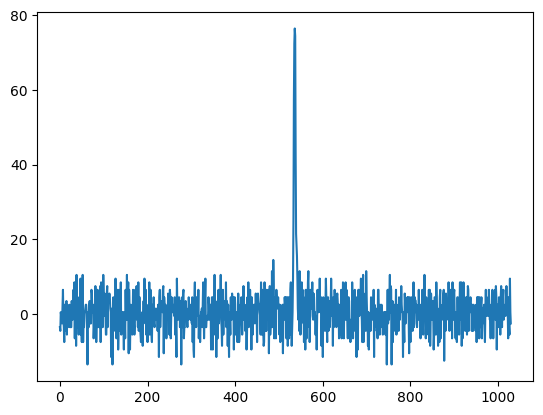

In [8]:
ev = file.read_event(align_method_read='max')

trace = ev[0].get_trace()

plt.plot(trace)


In [9]:
def cfd(F, L, O, trace):
    # F = self.CFD[0]
    # L = self.CFD[1]
    # O = self.CFD[2]
    cfdArr = np.zeros(len(trace))
    zero_cross = 0
    #calculate CFD 
    for i in range(O + L + 1, len(trace) - O - L - 1, 1):
        cfdArr[i] = np.sum(F * trace[i - L : i - 1] - trace[i - L - O : i - 1 - O])
    #find the inflection point
    closest = np.argmin(np.subtract(cfdArr, np.roll(cfdArr, 1)))
    lower = 0
    upper = 0
    #Locate the zero crossing near to the inflection point
    if cfdArr[closest] < 0:
        while cfdArr[closest] < 0:
            closest -= 1
        lower = closest
        upper = closest + 1
    else:
        while cfdArr[closest] > 0:
            closest += 1
        upper = closest
        lower = closest - 1


    #calculate the crossover time through a weighted average of the two nearest samples to the zero 
    sum_y = np.sum(np.abs(cfdArr[lower:upper + 1]))
    zero_cross = lower * (1 - np.abs(cfdArr[lower]) / sum_y) + (upper) * (1 - np.abs(cfdArr[upper]) / sum_y)

    return cfdArr, zero_cross


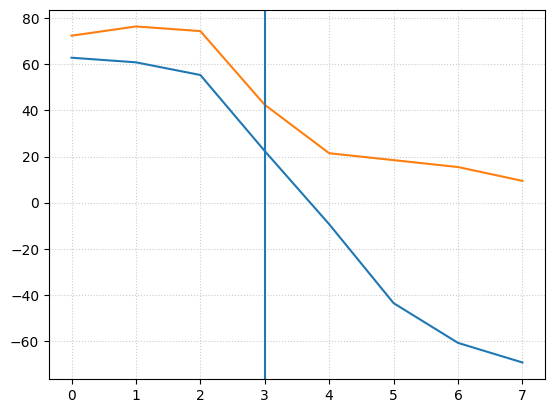

In [9]:
frac = 0.75
offset = 6

frac_trace = trace * frac
delay_trace = np.roll(trace, offset)

cfd_array = frac_trace - delay_trace

cfd_array_max_index = np.where(cfd_array == np.max(cfd_array))[0][0]
cfd_array_min_index = np.where(cfd_array == np.min(cfd_array))[0][0]

cfd_between_extrema = cfd_array[cfd_array_max_index:cfd_array_min_index]

zero_cross_index = cfd_array_max_index + np.where( np.diff( np.sign( cfd_array[cfd_array_max_index:cfd_array_min_index] ) ) != 0 )[0][0]


plt.plot(cfd_array[cfd_array_max_index:cfd_array_min_index])
# plt.plot(cfd_between_extrema)
plt.plot(trace[cfd_array_max_index:cfd_array_min_index])
plt.axvline(zero_cross_index - cfd_array_max_index)
# plt.plot(np.diff(cfd_array[cfd_array_max_index:cfd_array_min_index]))
# plt.plot(np.diff(np.sign(cfd_array))[530:580])
# plt.ylim(-4, 4)
plt.grid(color='#CCCCCC', linestyle=':')

In [ ]:
F = 0.75
L = 6
O = 6

cfd_array = np.zeros(len(trace))
zero_cross = 0

for i in range(O + L + 1, len(trace) - O - L - 1):
    for j in range(1, L):
        cfd_array[i] += F * trace[i - j]


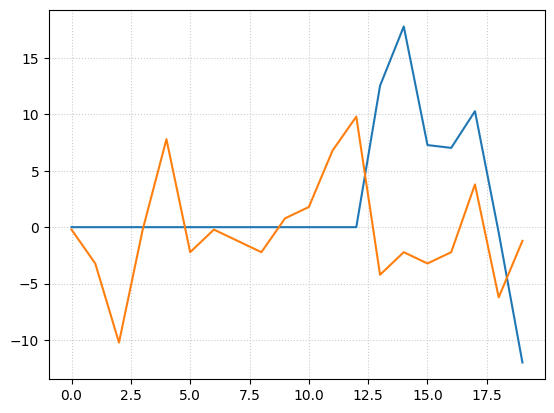

In [47]:
cfd_stuff = cfd(0.75, 6, 6, trace)
plt.plot(cfd_stuff[0][530:580])
plt.plot(trace[530:580])
plt.axvline(cfd_stuff[1]-530)
plt.grid(color='#CCCCCC', linestyle=':')

[502.] [547.] [742.]


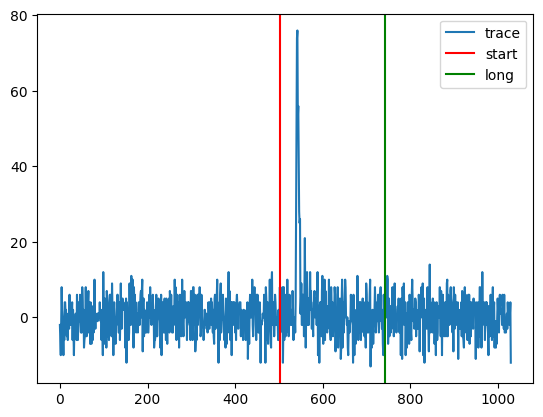

In [39]:
ev = file.read_event(align_method_read='max')

istart, ishort, ilong, align = ev[0].get_times()
print(istart, ishort, ilong)

plt.plot(ev[0].get_trace(), label='trace')
# plt.axvline(ev[0].get_t0(), label='t0')
plt.axvline(istart, label='start', color='red')
# plt.axvline(ishort, label='short', color='blue')
plt.axvline(ilong, label='long', color='green')
# plt.axvline(align, label='align', color='orange')
plt.legend()

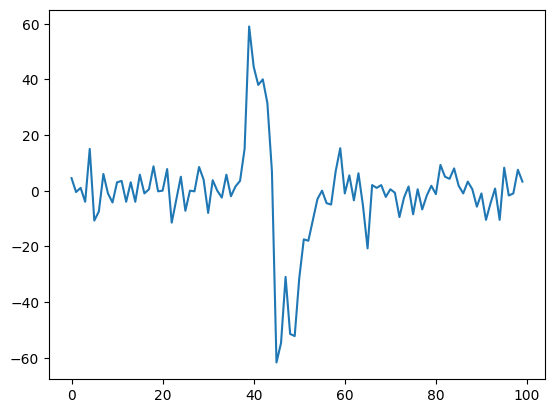

In [7]:
f = open('HELP.txt', 'r')
cfd_arr = np.loadtxt('cfd_arr')
trace = np.loadtxt('trace')

plt.plot(cfd_arr[500:600])
# plt.plot(trace)

In [2]:
t1 = time()
file.lst_out(10000, [0], [[1,1,0,0,0]], False, filename='fast_CFD_test.csv')
t2 = time()

print(f'Time taken: {t2-t1}')

index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0


/home/mkidson/gitRepos/dDAQ_dev/radical_changes/event.py:105: RuntimeWarning: invalid value encountered in scalar divide
  return self.shortIntegral / self.longIntegral


1000 events
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
2000 events
3000 events
index 0 is out of bounds for axis 0 with size 0
4000 events
5000 events
6000 events
index 0 is out of bounds for axis 0 with size 0
7000 events
8000 events
9000 events
10000 events
End reading
Time taken: 7.341538429260254


In [3]:
file.get_fails(True)

Channel: 0	Events: 10000	Fails: 34.0
tstart: 8.0	tlong: 26.0	tshort: 1.0	integral: 0.0	t0: 6.0


(array([[ 8., 26.,  1.,  0.,  6.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]]),
 array([34.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 10000)

In [2]:
t1 = time()
file.lst_out(10000, [0], True, False, filename='no_CFD_test.csv')
t2 = time()

print(f'Time taken: {t2-t1}')

1000 events
2000 events
3000 events
4000 events
5000 events
6000 events
7000 events
8000 events
9000 events
10000 events
End reading
Time taken: 11.908527851104736


In [12]:
import csv

L_CFD = []
S_CFD = []

CFD_file = open('fast_CFD_test.csv', 'r')

CFD_reader = csv.reader(CFD_file)

for row in CFD_reader:
    L_CFD.append(float(row[0]))
    S_CFD.append(float(row[1]))


FileNotFoundError: [Errno 2] No such file or directory: 'CFD_test.csv'

In [7]:
print(type(L_CFD[0]))

<class 'float'>


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([   0.  ,   31.25,   62.5 ,   93.75,  125.  ,  156.25,  187.5 ,
         218.75,  250.  ,  281.25,  312.5 ,  343.75,  375.  ,  406.25,
         437.5 ,  468.75,  500.  ,  531.25,  562.5 ,  593.75,  625.  ,
         656.25,  687.5 ,  718.75,  750.  ,  781.25,  812.5 ,  843.75,
         875.  ,  906.25,  937.5 ,  968.75, 1000.  , 1031.25, 1062.5 ,
        1093.75, 1125.  , 1156.25, 1187.5 , 1218.75, 1250.  , 1281.25,
        1312.5 , 1343.75, 1375.  , 1406.25, 1437.5 , 1468.75, 1500.  ,
        1531.25, 1562.5 , 1593.75, 1625.  , 1656.25, 1687.5 , 1718.75,
        1750.  , 1781.25, 1812.5 , 1843.75, 1875.  , 1906.25, 1937.5 ,
        1968.75, 2000.  , 2031.25, 2062.5 , 2093.75, 2125.  , 2156.25,
        2187.5 , 2218.75, 2250.  , 2281.2

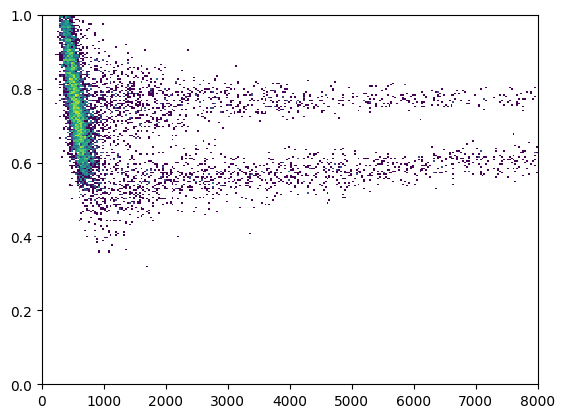

In [11]:
plt.hist2d(L_CFD, S_CFD, [256,256], norm=colors.LogNorm(vmin=1), range=((0, 8000), (0, 1)))

In [7]:

L_no_CFD = []
S_no_CFD = []

no_file = open('no_CFD_test.csv', 'r')

no_reader = csv.reader(no_file)

for row in no_reader:
    L_no_CFD.append(float(row[0]))
    S_no_CFD.append(float(row[1]))


(array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([  573.4      ,   795.8859375,  1018.371875 ,  1240.8578125,
         1463.34375  ,  1685.8296875,  1908.315625 ,  2130.8015625,
         2353.2875   ,  2575.7734375,  2798.259375 ,  3020.7453125,
         3243.23125  ,  3465.7171875,  3688.203125 ,  3910.6890625,
         4133.175    ,  4355.6609375,  4578.146875 ,  4800.6328125,
         5023.11875  ,  5245.6046875,  5468.090625 ,  5690.5765625,
         5913.0625   ,  6135.5484375,  6358.034375 ,  6580.5203125,
         6803.00625  ,  7025.4921875,  7247.978125 ,  7470.4640625,
         7692.95     ,  7915.4359375,  8137.921875 ,  8360.4078125,
         8582.89375  ,  8805.3796875,  9027.865625 ,  9250.3515625,
         9472.8375   ,  9695.3234375,  9917.809375 , 10140.2953125,
   

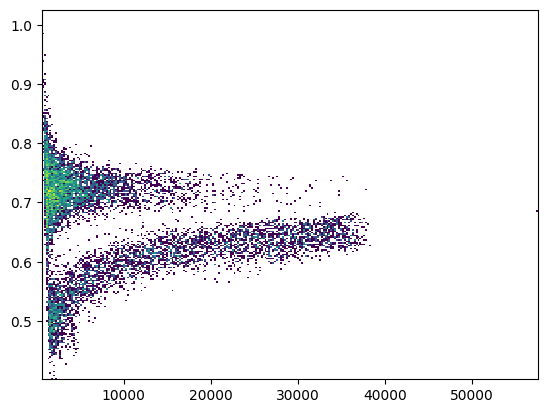

In [8]:
plt.hist2d(L_no_CFD, S_no_CFD, [256,256], norm=colors.LogNorm(vmin=1))

In [2]:
file.lst_out(10000, [0], [1,1,0,0,0], False, filename='test_out.csv')

1000 events
2000 events
3000 events
4000 events
5000 events
6000 events
7000 events
8000 events
9000 events
10000 events
End reading


In [4]:
labels = np.array(['L [ch]', 'S[ch]', 'T (trigger) [us]', 'baseline', 'pulse height [bits]'])

out = np.array([1,1,0,0,0])

print(labels[out == 1])

['L [ch]' 'S[ch]']
